# Interactive Data Visualization
##### (C) 2023-2025 Timothy James Becker: [revision 1.0](),  [GPLv3 license](https://www.gnu.org/licenses/gpl-3.0.html) 

## <u>High Dimension Visualization</u>

As we have progressed through the previous sections, we have started working with more complex datasets that pose analysis (and visualization) problems from having missing values to having multi-values (IE embedded multi-column).  Are workflows have resulting in selecting some of the columns of data and then mapping the data domains into the pixel (or color space). Typically this gives us three dimensions to visualize and if we used a 3D library like [threejs](https://threejs.org/) we would be able to visualize up to four colors (keeping in mind that the depth position (z-axis) is not as easy to see as positions in 2D (y and x axis) and that color can pose an interindividual problem where some people can see a difference while others can not.  In this section we will start to look at ways to visualize all of our data columns at once projected into a 2D space (keeping in mind we could do this in 3D space as well). The key part as we will see is shown below in gray which is the transformation that the high dimensional data will undergo to lower dimension (2D going to 1D on a line).

The simple method involves geometric projection (or dimensional collapsing) where you can imagine objects in 3D space are collapsed into 2D.  Think of a light source pointed at a 3D object (like a ball) which casts a 2D shadow (circle) on the wall surface.
<img src="figures/dimension_reduction_project.png" alt="dimension reduction" width="800px">


#### <u>Dimension Reduction</u>
The core mechanism for visualization of data in a high dimension is through the methodology of dimension reduction where multiple column variables are combined into a new composite variable. We will first look at linear combinations and Principal Component Analysis [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) before moving on to non-linear (random projection based) methods.

The first method we will look at involves a transformation of the high level (numeric variables) into a linear equation where each variable will have a coefficient and will lead to transformation $i$  expressed as: 

### $Z_i = \phi_1 x_1 + \phi_2 x_2 + ... \phi_d x_d$

<img src="https://upload.wikimedia.org/wikipedia/commons/9/9c/PCA_Projection_Illustration.gif" alt="PCA" width="800px">


#### <u>PCA</u>

But how exactly should we select the coefficient variables? That is a good question and if we assume that we want a linear combination of variables we can express the coefficients as a measure of the information they contribute overall. In other words, we can set each coefficient to be the amount of information each variable contributes to the overall dataset. One common way to do this is to look at the total variance over the whole dataset and boost variables based on their uniqueness (IE they do not correlate or associate with any other variables). this leads to a simple formation of PCA:

### $\displaystyle \max \limits_{\phi 11, ... , \phi d1} \left\{ \frac{1}{n} \sum_{i=1}^{n} \left( \sum_{j=1}^{d} {\phi_{j1} x_{ij}} \right) \right\}   \text{ subject to } \sum_{j=1}^{d} \phi_{j1}^2 = 1$

(formulation from [Introduction to Statistical Learning]( https://www.statlearning.com/))


#### <u>Example Dataset: Iris</u>

We will look at a very easy table with numerical values to start and then work our way into data that has many more columns to see how PCA works. We need the scikit learn package (which is included in anaconda). This tutorial is based on an intro in scikit learn [here](https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py).

In [1]:
#!pip install scikit-learn
from sklearn import datasets
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np

In [2]:
iris = datasets.load_iris()
iris['data'][0:10] #columns are sepal_len sepal_width, petal_len, petal_width

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

Here we have a dataset that is 4D so that we can easily collapse it to 2D. The number of lost dimensions will play affect the distortion that will occur in the pairwise distances in the original data dimensional space. For example, if we are losing two dimensions here the maximal distortion would be bounded by the most maximal valued dimensions. Consider the following rows of data which we will call $p_1$ and $p_2$:

$p_1 = \left[  5.1, 3.5, 1.4, 0.2 \right]$

$p_2 = \left[  4.4, 2.9, 1.5, 0.2 \right]$

When we look at the distance between these points we have (using the squared absolute difference: L2 and assuming we have $d$ dimensions)

### $\delta(p_i,p_j) = \sqrt{(p_{1i}-p_{1j})^2+(p_{2i}-p_{2j})^2+ ... +(p_{di}-p_{dj})^d} $ 

When we apply this to out points in the original dimension we get:

$\delta(p_1,p_2) = \sqrt{(5.1-4.4)^2+(3.5-2.9)^2+(1.4-1.5)^2+(0.2-0.2)^2} = \sqrt{0.489+0.36+0.01+0.0} = 0.927$

When we apply the PCA and project from 4D to 2D we get:


In [30]:
pca = PCA(n_components=2).fit(iris['data'])
Z = pca.transform(iris['data'])
Z[0:10]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425]])

$\delta(p_1,p_2) = \sqrt{(-2.684+2.886)^2+(0.319+0.578)^2} = 0.329$

What may happen besides this basic metric distance distortion is that a dimension reduction that doesn't preserve topological ordering meaning that two points that were closer to each other in the original higher dimension than a third point may become further away to each other and then become close to the third point. In other words, the ordering can be broken! This particular data is supervised and has a labeling associated with it which is related to the observational names of the Iris flowers. Let’s plot the PCA of the data and use the labels that are provided as the colors for our scatter plot.

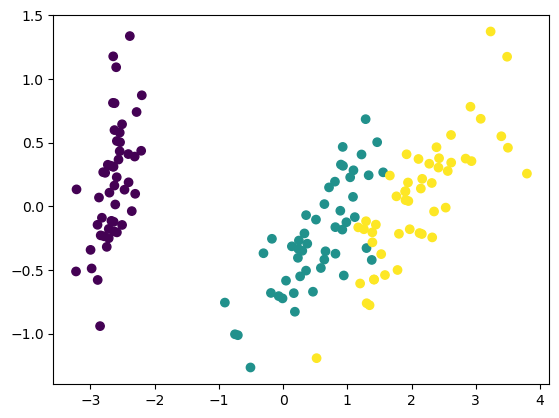

In [36]:
plt.scatter(Z[:,0],Z[:,1],c=iris['target'])

We can see the PCA seems to work well when we have 4D and are going into 2D.  But what about higher dimensions? In general, when we want to find a dimension-reduction on information rich data we will simply crush it and cause massive distortion in scaled metrics (and sometimes topological ordering). But if the data is sparse and the variables contain some dependencies with respect to each other (as we learning in imputation) we can build a non-linear dimensional reduction that preserves the relationships well. This is called [Manifold Learning](https://scikit-learn.org/stable/modules/manifold.html) and is an important open area of Computer Science.

#### <u>Datasets: DIGITS</u>

This dataset is a 8x8 monochromatic image of a hand written digit (0-5). This gives us a much higher dimension of 64 for each point which means we are transforming 64D to 2D. Let’s take a look and see how PCA performs in this task.


In [4]:
#load another higher dimensional dataset that also has labels to see how PCA performs in that application
digits = datasets.load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30

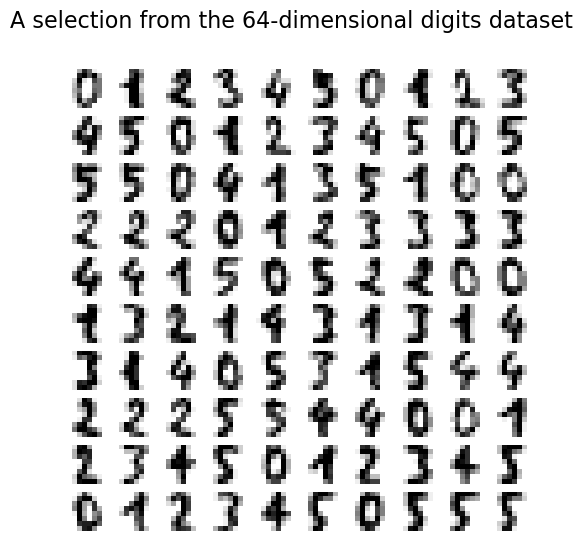

In [44]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

In [45]:
pca2 = PCA(n_components=2).fit(digits['data'])
Z2 = pca2.transform(digits['data'])
Z2[0:10]

array([[ 10.76255844, -24.73806944],
       [ -0.62690579,  26.83050009],
       [  1.68579972,  12.29145392],
       [-16.61222302,  -3.65908681],
       [ 24.14568878,   7.79591404],
       [ -7.74436955,  -6.51681831],
       [ 19.3305852 , -15.38451763],
       [  6.07818404,  15.32159662],
       [-11.90896923,   7.87806248],
       [-18.05337314,  -7.4271508 ]])

{0, 1, 2, 3, 4, 5}


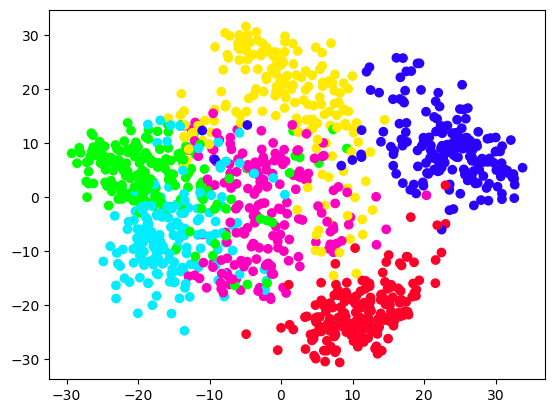

In [53]:
print(set(digits['target']))
plt.scatter(Z2[:,0],Z2[:,1],c=digits['target'],cmap=plt.cm.gist_rainbow) #fix the colors so we have 6 divergent?

The result is fine since we can see the digits classes are separated, but there is clearly large overlap between them digits and some improvement may be had if we try to utilize a non-linear transformation. We will now try random-projection based transforms that will attempt to keep local topology intact. Two popular methods are T-distributed Stochastic Neighbor Embedding or [TSNE]( https://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) and the other one is called Uniform Manifold Approximation or [UMAP](https://umap-learn.readthedocs.io/en/latest/)

#### <u>TSNE</u>

T-distributed stochastic neighboor embedding [TSNE](https://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) will use the pairwise distances to find local neighboors of each point in the high dimensional space and then randomly project into the lower dimension while checking the overal scoring of the neighbors. In this way it will seperate out values that are more diverging and more closer items that are neighbors.

In [2]:
#!pip install umap-learn
import umap
from sklearn.manifold import TSNE

In [5]:
X_emb = TSNE(n_components=2,perplexity=8).fit_transform(digits['data'])

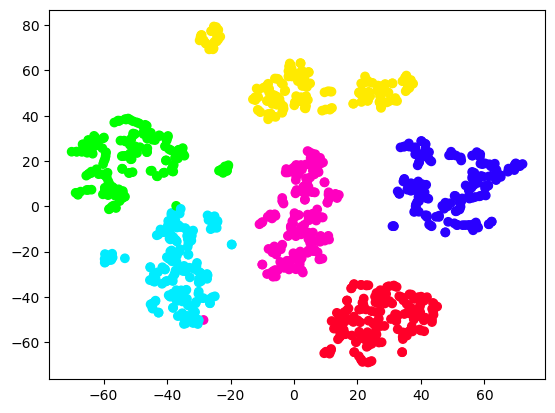

In [6]:
plt.scatter(X_emb[:,0],X_emb[:,1],c=digits['target'],cmap=plt.cm.gist_rainbow)

Here we have a much greater separation between the digits making the process of discovering potential classes in this data clearer. Let’s also do this with UMAP and look at the result!

#### <u>UMAP</u>

Uniform Manifold Approximation on the other hand assumes there is a low-dimensional latent structure and seeks to randomly find that result by preserving the topological ordering using a similair nearest neighbor approach. The difference is how UMAP will stick together families of neighbors. The end result will provide even more seperation than TSNE in this digits dataset.


In [68]:
X_um = umap.UMAP(n_components=2).fit_transform(digits['data'])

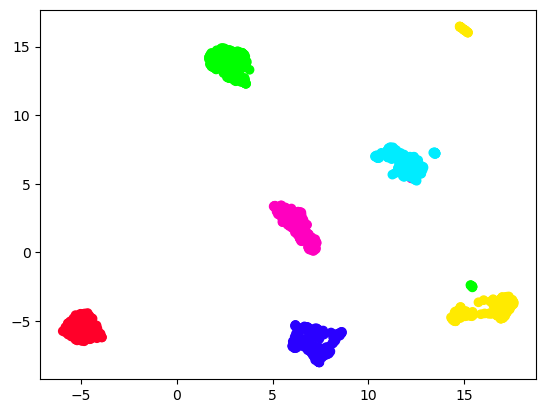

In [69]:
plt.scatter(X_um[:,0],X_um[:,1],c=digits['target'],cmap=plt.cm.gist_rainbow)

Here we can see that the relationships have been packed even closer together in tight clusters. This is a favorite algorithm for many for visualizing high dimensional data for this very reason.

#### <u> Very High Dimensional Data </u>

The real question then is how will these methods perform on very high dimensional data (~30,000 dimensions?).  Biological single cell experiemnts are generating this exact kind of data from the transcript expression levels that are captured from tissues.  Here the scientists are both interested in discovering what the individual expression patterns are for any given cell (the $x_1$ to $x_30000$ values of any row $i$ but also in discovering which cells are closely related (cell type). For example in brain tissue a scientist wants to look at a particuliar cell called an astrocyte (a subtype of the glial cell) in the cortex, by looking at clusters and using known expression patterns for purified astricytes the scientist can mark astrocytes in any tissue study and therby learn more about the cellular function (impaired function is tied to neurological disorders)

Lets, look at an expression matrix from mouse dental palette derived from a study by [Bayarsaihan, Becker and Enkhmandakh](https://doi.org/10.1002/jcb.30608). It normally consists of rows (cells of data) that have each of the protein coding genes in the mouse set as columns. But here it has been transformed to that the 16 cell clusters (previously grouped) have average expression values for rows.  In the github repo the data can be found [here](https://github.com/timothyjamesbecker/Interactive_Data_Visualization/raw/refs/heads/main/data/differential_expression.csv.gz)

In [7]:
#loading in the gene expression data
import gzip
with gzip.GzipFile('data/differential_expression.csv.gz','rb') as f:
    raw = [row.decode('UTF-8').replace('\n','').split(',') for row in f.readlines()]
header,raw = raw[0],raw[1:]
print(header)
print(raw[0])

['Feature ID', 'Feature Name', 'Cluster 1 Mean Counts', 'Cluster 1 Log2 fold change', 'Cluster 1 Adjusted p value', 'Cluster 2 Mean Counts', 'Cluster 2 Log2 fold change', 'Cluster 2 Adjusted p value', 'Cluster 3 Mean Counts', 'Cluster 3 Log2 fold change', 'Cluster 3 Adjusted p value', 'Cluster 4 Mean Counts', 'Cluster 4 Log2 fold change', 'Cluster 4 Adjusted p value', 'Cluster 5 Mean Counts', 'Cluster 5 Log2 fold change', 'Cluster 5 Adjusted p value', 'Cluster 6 Mean Counts', 'Cluster 6 Log2 fold change', 'Cluster 6 Adjusted p value', 'Cluster 7 Mean Counts', 'Cluster 7 Log2 fold change', 'Cluster 7 Adjusted p value', 'Cluster 8 Mean Counts', 'Cluster 8 Log2 fold change', 'Cluster 8 Adjusted p value', 'Cluster 9 Mean Counts', 'Cluster 9 Log2 fold change', 'Cluster 9 Adjusted p value', 'Cluster 10 Mean Counts', 'Cluster 10 Log2 fold change', 'Cluster 10 Adjusted p value', 'Cluster 11 Mean Counts', 'Cluster 11 Log2 fold change', 'Cluster 11 Adjusted p value', 'Cluster 12 Mean Counts', 'C

Lets simply look at the mean counts for each cluster for each gene and look at the data in reduced dimensional form.

In [12]:
genes = [row[1] for row in raw]
genes[0:10]

['Xkr4',
 'Gm1992',
 'Rp1',
 'Sox17',
 'Gm37323',
 'Mrpl15',
 'Lypla1',
 'Gm37988',
 'Tcea1',
 'Rgs20']

In [17]:
[raw[0][e] for e in range(2,16*3+2,3)] #get all the mean values

['0.0',
 '0.0006430987117357778',
 '0.0',
 '0.0018667727847361028',
 '0.0',
 '0.011242018889320684',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.03094213573334674',
 '0.021434305808432138',
 '0.0',
 '0.0075216175383329585',
 '0.0']

In [8]:
import numpy as np
data = np.asarray([[row[e] for e in range(2,16*3+2,3)] for row in raw],dtype=np.float32)
data.shape,data[0:5]

((21889, 16),
 array([[0.0000000e+00, 6.4309873e-04, 0.0000000e+00, 1.8667728e-03,
         0.0000000e+00, 1.1242019e-02, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.0942136e-02,
         2.1434305e-02, 0.0000000e+00, 7.5216177e-03, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         2.3747617e-03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         4.2868610e-03, 0.0000000e+00, 1.5043235e-02, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 1.3703019e-03, 3.7335455e-03,
         1.1190767e-02, 1.6060027e-03, 9.6299713e-03, 0.0000000e+00,
         1.187380

In [9]:
X_um = umap.UMAP(n_components=2).fit_transform(data)

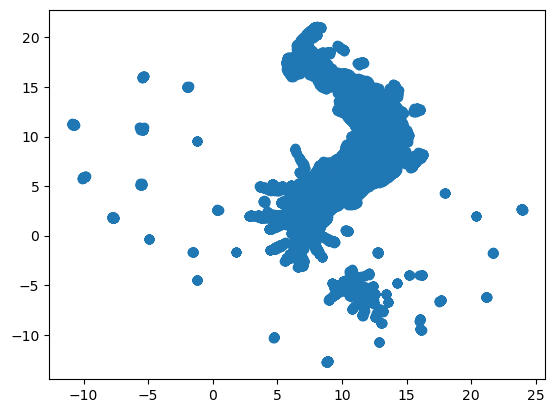

In [10]:
plt.scatter(X_um[:,0],X_um[:,1])

# Exercises

#### [1] Load in another dataset from sklearn datasets and try PCA and UMAP on it
#### [2] Try another clustering method on the DIGITS and IRIS
#### [3] Try PCA on the gene expresison data and look at the result
#### [4] Tanspose the gene expression and plot the 16 clusters using UMAP